<a href="https://colab.research.google.com/github/tefarov/netology_pyda5/blob/master/diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sb
from scipy import stats

from matplotlib import pyplot as plt

## Задание 1
Загрузить файл hr.csv.

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')
pth = '/content/drive/My Drive/HR.csv'

#pth = '/content/HR.csv'
data = pd.read_csv(pth)

In [3]:
def fx_classify(value):
  if value == 'high':
    return 3
  elif value == 'medium':
    return 2
  else:
    return 1

data['salary_num'] = data['salary'].map(fx_classify)
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


## Задание 2.
Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
for col in data.columns:
  dat = data[col]
  
  if dat.dtype in ['int64','float64']:
    print(f'--- {col} ------')
    print('Среднее',round(dat.mean(),2))
    print('Медиана', round(dat.median(),2))
    print('Мода', dat.mode() if dat.dtype == 'int64' else '-')
    print('Минимум',dat.min())
    print('Максимум',dat.max())
    print('Стандартное отклонение',round(dat.std(),2))
    print('')
    

--- satisfaction_level ------
Среднее 0.61
Медиана 0.64
Мода -
Минимум 0.09
Максимум 1.0
Стандартное отклонение 0.25

--- last_evaluation ------
Среднее 0.72
Медиана 0.72
Мода -
Минимум 0.36
Максимум 1.0
Стандартное отклонение 0.17

--- number_project ------
Среднее 3.8
Медиана 4.0
Мода 0    4
dtype: int64
Минимум 2
Максимум 7
Стандартное отклонение 1.23

--- average_montly_hours ------
Среднее 201.05
Медиана 200.0
Мода 0    135
1    156
dtype: int64
Минимум 96
Максимум 310
Стандартное отклонение 49.94

--- time_spend_company ------
Среднее 3.5
Медиана 3.0
Мода 0    3
dtype: int64
Минимум 2
Максимум 10
Стандартное отклонение 1.46

--- Work_accident ------
Среднее 0.14
Медиана 0.0
Мода 0    0
dtype: int64
Минимум 0
Максимум 1
Стандартное отклонение 0.35

--- left ------
Среднее 0.24
Медиана 0.0
Мода 0    0
dtype: int64
Минимум 0
Максимум 1
Стандартное отклонение 0.43

--- promotion_last_5years ------
Среднее 0.02
Медиана 0.0
Мода 0    0
dtype: int64
Минимум 0
Максимум 1
Стандартное откл

##Задание 3
Рассчитать и визуализировать корреляционную матрицу для переменных.

In [5]:
dat = data.drop(['number_project','sales','salary'],axis='columns')
dsp = dat.corr().round(2)
dsp

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
satisfaction_level,1.00,0.11,-0.02,-0.10,0.06,-0.39,0.03,0.05
last_evaluation,0.11,1.00,0.34,0.13,-0.01,0.01,-0.01,-0.01
average_montly_hours,-0.02,0.34,1.00,0.13,-0.01,0.07,-0.00,-0.00
time_spend_company,-0.10,0.13,0.13,1.00,0.00,0.14,0.07,0.05
Work_accident,0.06,-0.01,-0.01,0.00,1.00,-0.15,0.04,0.01
left,-0.39,0.01,0.07,0.14,-0.15,1.00,-0.06,-0.16
promotion_last_5years,0.03,-0.01,-0.00,0.07,0.04,-0.06,1.00,0.10
salary_num,0.05,-0.01,-0.00,0.05,0.01,-0.16,0.10,1.00


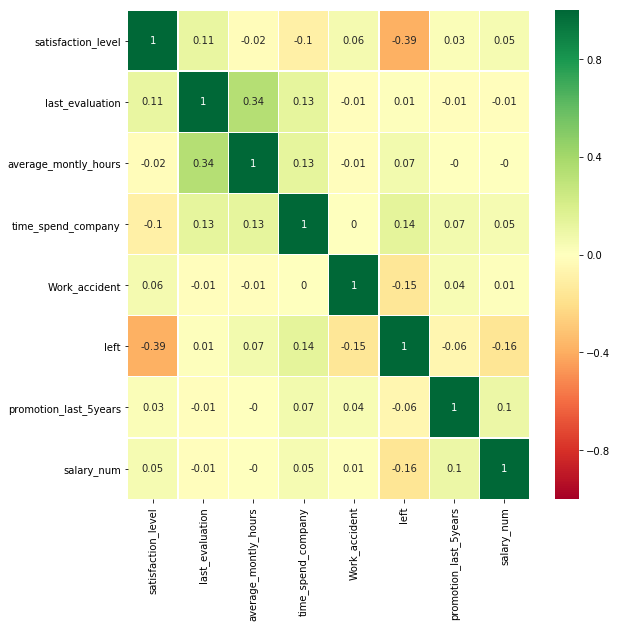

In [6]:
sb.heatmap(dsp,annot=True,cmap='RdYlGn',linewidths=0.2,vmin=-1)

fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

###Вывод
Наибольшую корреляцию, а значит завиисмость, мы видим между следующими факторами :
*   Обратная зависимость средней силы между увольнением и уровнем удовлетворённости, что говорит о том, что недовольные работники очень часто увольняются
*   Прямая зависимость средней силы между среднемесячным количеством отработанных часов и итогами последней аттестации, что говорит о том, что трудоголики как правило получают более высокие оценки на аттестации



##Задание 4
Визуализировать несколько взаимосвязей между переменными.


2000


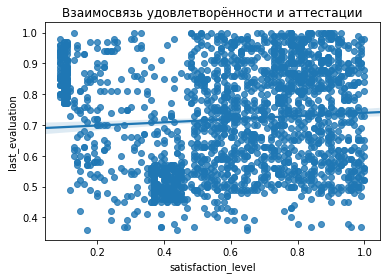

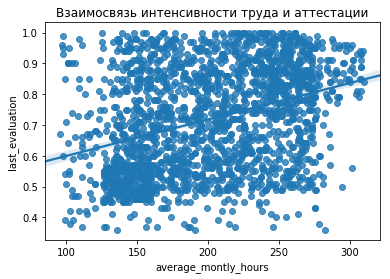

In [28]:
def fx_display(dsp,dsp_x, dsp_y,title=None):
  sb.regplot(x=dsp_x, y=dsp_y,data=dsp,fit_reg=True)
  plt.xlabel(dsp_x)
  plt.ylabel(dsp_y)
  if title != None: plt.title(title)
  plt.show()  

dsp = data.sample(2000)
print(len(dsp))
  
fx_display(dsp,'satisfaction_level','last_evaluation','Взаимосвязь удовлетворённости и аттестации')
fx_display(dsp,'average_montly_hours','last_evaluation','Взаимосвязь интенсивности труда и аттестации')

### Вывод
1. Судя по наклону прямой на графике 1 - взаимосвязь удовлетворйнности и аттестации очень слабая. Вероятно для выявления тенденций и взаимосвязей, данные необходимо будет предвариетльно кластеризовать, так, судя распределению полученных результатов, можно выделить как минмум 3 различных кластера для дальнейшего анализа : 
*   0.4+-0.005; 0.5+-0.05
*   0.75+-0.25; 0.8+-0.2
*   0.00 +0.05; 0.9+-0.1

2. Судя по наклону прямой на графике 2 - взаимосвязь интесивности труда и аттестации есть и она прямая. Для того чтобы делать выводы о причине такой зваимосвязи необходимо делать предварительную кластеризацию данных :
* 150+-25; 0.5+-0.05
* 250+-25; 0.9+-0.10
* 200+-75; 0.7+-0.25



##Задание 5
С использованием t-test статистики проверить взаимосвязи между несколькими переменными.


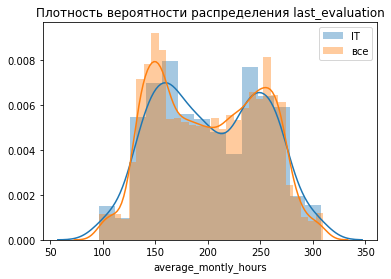

t-критерий: 0.806
pval:0.421


In [51]:
dat = data

flt = ('IT','все','average_montly_hours')

dat_0 = dat.loc[dat['sales']==flt[0]][flt[2]]
dat_1 = dat[flt[2]]

sb.distplot(dat_0)
sb.distplot(dat_1)
plt.title('Плотность вероятности распределения ' + flt[2])
plt.legend([flt[0],'все'])
plt.show()

val = stats.ttest_1samp(dat_0, dat_1.mean())
print(f't-критерий: {val.statistic:.3}\npval:{val.pvalue:.3}')

### Вывод
В связи с тем, что t-критерий отличен от 0, а p-val выше значения ошибки 0.05, то можно утверждать, что распределение последнего повышения в отделе IT аналогично распределению во всей компании

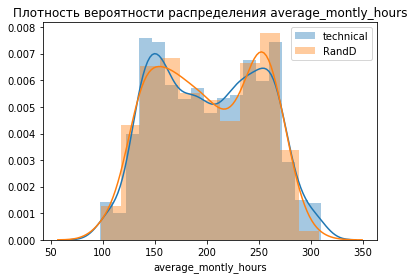

t-критерий: 0.834
pval:0.405


In [56]:
dat = data

flt = ('technical','RandD','average_montly_hours')

dat_0 = dat.loc[dat['sales']==flt[0]][flt[2]]
dat_1 = dat.loc[dat['sales']==flt[1]][flt[2]]

sb.distplot(dat_0)
sb.distplot(dat_1)
plt.title('Плотность вероятности распределения ' + flt[2])
plt.legend([flt[0],flt[1]])
plt.show()

val = stats.ttest_ind(dat_0, dat_1)
print(f't-критерий: {val.statistic:.3}\npval:{val.pvalue:.3}')

### Вывод
В связи с тем, что t-критерий отличен от 0, а p-val выше значения ошибки 0.05, то можно утверждать, что распределение последнего повышения в отделе technical аналогично распределению в отделе R&D

##Задание 6
Рассчитать сколько работников работает в каждом департаменте.

In [0]:
# оставляем в наборе данных только тех, кто не уходил из компании
dat = data.loc[data['left']==0]

dsp = dat.groupby('sales').count()[['salary']]
dsp.columns = ['workers']
dsp


,workers
sales,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


### Вывод
Наибольшее количество работников работает в отделе продаж и техническом. Наиболее странное количество в отделе исследований и разработок.

##Задание 7
Показать распределение сотрудников по зарплатам.


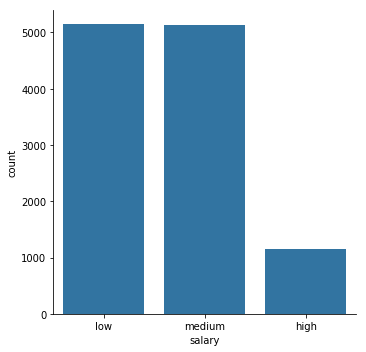

In [0]:
# оставим только тех, кто ещё не ушёл из компании
dsp = data.loc[data['left']==0]

sb.catplot(x='salary',kind='count',color="#1F78B4",data=dsp)
plt.show()

##Задание 8
Показать распределение сотрудников по зарплатам совместно с департаментами.


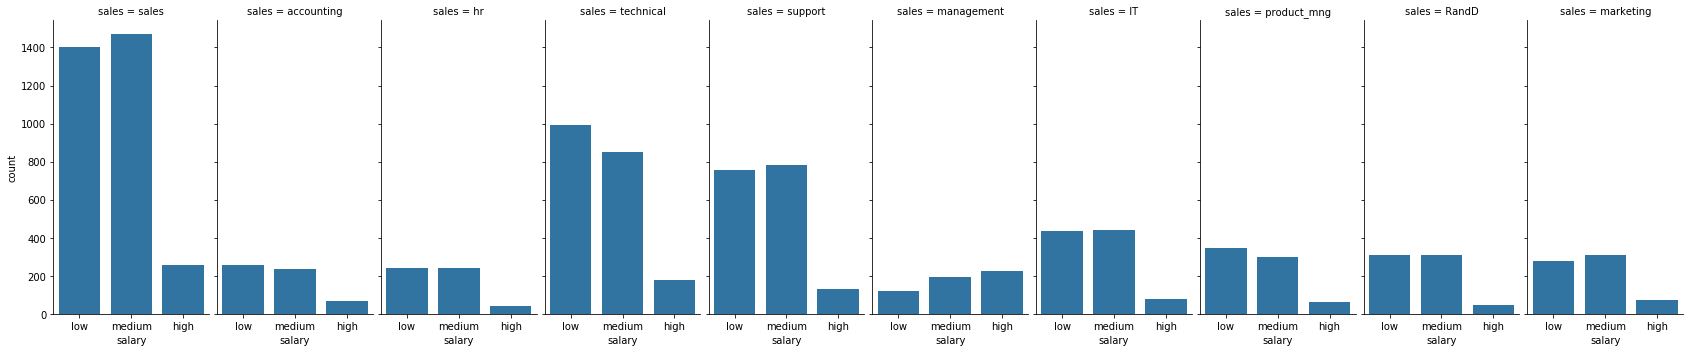

Мне такой варинат конкретно в этом задании меньше нравится, но возможно и так


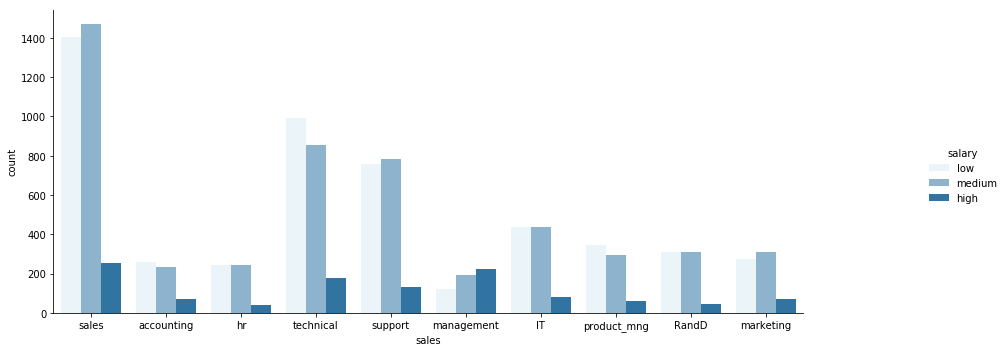

In [0]:
# оставим только тех, кто ещё не ушёл из компании
dat = data.loc[data['left']==0]
  
sb.catplot(x='salary',col='sales',kind='count',color='#1F78B4',data=dat)

fig=plt.gcf()
fig.set_size_inches(23,5)
plt.show()

print('Мне такой варинат конкретно в этом задании меньше нравится, но возможно и так')
sb.catplot(x='sales',hue='salary',kind='count',color='#1F78B4',data=dat)
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.show()


### Вывод
Практически во всех отделах распределение зарплат нормальное : большинство человек получают маленькие и средние заработные платы, и только в руководстве количество людей с высокими заработными платами - наибольшая.

##Задание 9
Сколько сотрудников покинули компанию.


In [0]:
dat = data.loc[data['left']==1]

print(f'Компанию покинули {len(dat)} сотрудников')

Компанию покинули 3571 сотрудников


##Задание 10
Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

###Гипотеза 1
Компанию покидают сотрудники с низкой удолетворённостью

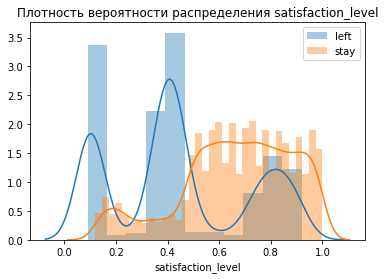

t-критерий: -51.613
pval:0.000


In [77]:
dat = data

flt = ('left','stay','satisfaction_level')

dat_0 = dat.loc[dat['left']==1][flt[2]]
dat_1 = dat.loc[dat['left']==0][flt[2]]

sb.distplot(dat_0)
sb.distplot(dat_1)
plt.title('Плотность вероятности распределения ' + flt[2])
plt.legend([flt[0],flt[1]])
plt.show()

val = stats.ttest_ind(dat_0, dat_1)
print(f't-критерий: {val.statistic:.3f}\npval:{val.pvalue:.3f}')

Исходя из того, что pval=0, можно сделать вывод, что уровень удовлетворённости среди тех кто ушёл и среди тех кто, остался - принципиально отличается, в связи с чем можно утверждать, что гипотеза подтверждается.

###Гипотеза 2
Среди тех, кто ушёл не из-за низкого уровня удовлетворённости - ценные сотрудники с высокими оценками по аттестации, которых переманили в другие компании

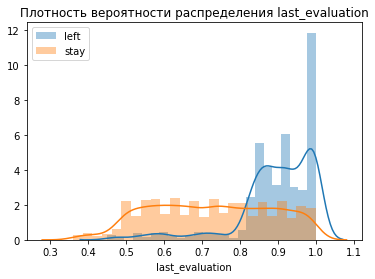

t-критерий: 34.156
pval:0.000


In [76]:
dat = data
dat = dat.loc[data['satisfaction_level']>0.5]

flt = ('left','stay','last_evaluation')

dat_0 = dat.loc[dat['left']==1][flt[2]]
dat_1 = dat.loc[dat['left']==0][flt[2]]

sb.distplot(dat_0)
sb.distplot(dat_1)
plt.title('Плотность вероятности распределения ' + flt[2])
plt.legend([flt[0],flt[1]])
plt.show()

val = stats.ttest_ind(dat_0, dat_1)
print(f't-критерий: {val.statistic:.3f}\npval:{val.pvalue:.3f}')

Судя по тому, что pval=0, то опять же можно утверждать, что распределения среди уволенных и неуволенных имеют кардинально различные распределения, что свидетельствует о том, что гипотеза подтверждается